In [8]:
from base import *

test_metadata = RunMetaData(rootdir= r"/mridir", subject="sub-s001", datatype="func", session="ses-1")
test_metadata

In [9]:
test_metadata.set_derivatives_place(["derivatives","haha"])
test_metadata.derivatives_path

'/mridir/derivatives/haha/sub-s001/ses-1/func'

In [10]:
test_node1 = Node("node1", describe= "testnode1", suffix="suffix1")
test_node2 = Node("node2", describe= "testnode2", suffix="suffix2")
test_node3 = Node("node3", describe= "testnode3", suffix="suffix3")
test_node4 = Node("node4", describe= "testnode4", suffix="suffix4")
test_node5 = Node("node5", describe= "testnode5", suffix="suffix5")

In [11]:
test_work1 = Work("work1", [test_node1, test_node2], [test_node3, test_node4])
test_work2 = Work("work2", [test_node3, test_node4], [test_node5])
def action1(input_nodes, output_nodes, run_metadata):
    print(f"{os.path.join(run_metadata.derivatives_path, input_nodes[0].name)}")

test_work1.action = action1
test_work2.action = action1


In [12]:
test_workflow = Workflow()
print(test_work1)
test_workflow.add_work(test_work1)
test_workflow.add_work(test_work2)
test_workflow.run(test_metadata)

/mridir/derivatives/haha/sub-s001/ses-1/func/node1
/mridir/derivatives/haha/sub-s001/ses-1/func/node3


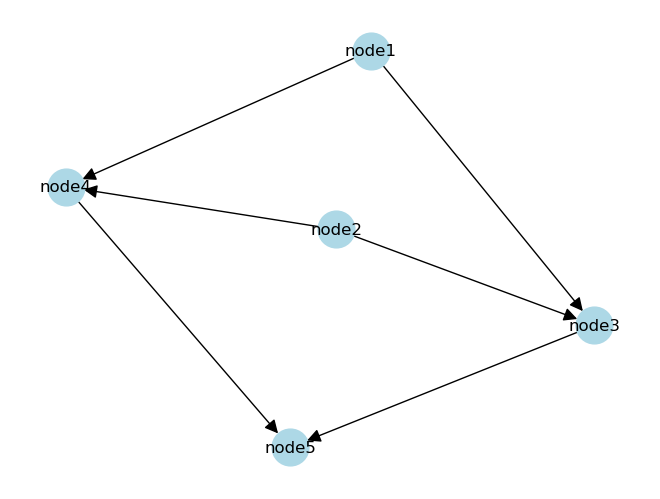

In [13]:
test_workflow.draw_graph()

In [14]:
workflow1 = Workflow()
workflow2 = Workflow()
workflow1.add_work(test_work1)
workflow2.add_work(test_work2)
merged_workflow = Workflow.merge_workflow(workflow1, workflow2)
merged_workflow.run(test_metadata)
get_common_nodes_name(workflow1, workflow2)

workflow1.__hash__()

/mridir/derivatives/haha/sub-s001/ses-1/func/node1
/mridir/derivatives/haha/sub-s001/ses-1/func/node3


8793686877546